In [1]:
from arc_circ_sim import ArcCircSim
from utils.get_backend import get_backend
from qiskit import IBMQ, transpile

In [2]:
n = 3
error_list = ArcCircSim.generate_all_unique_pauli_errors(n)
backend = get_backend()

basic_tests = [
   ["XII", "III", "III"],
   ["ZII", "III", "III"],
   ["IXI", "III", "III"],
   ["IZI", "III", "III"],
   ["IIX", "III", "III"],
   ["IIZ", "III", "III"], 
]


experiments = []
for noise in basic_tests:
    res = [0] * 6 # [[arc, trans, job, counts, UFSyndrome, UFResults]]
    res[0] = ArcCircSim(n, pauli_noise_list=noise)
    res[1] = transpile(res[0].code_circ, backend=backend)
    res[2] = backend.run(res[1])
    res[3] = res[2].result().get_counts()
    experiments.append(res) 


for res in experiments:
    print(res[0].pauli_noise_list)
    print(res[3])
    print()


['XII', 'III', 'III']
{'101 00': 232, '001 00': 274, '000 00': 260, '100 00': 258}

['ZII', 'III', 'III']
{'001 10': 258, '100 10': 264, '000 10': 236, '101 10': 266}

['IXI', 'III', 'III']
{'011 11': 257, '111 11': 265, '010 11': 257, '110 11': 245}

['IZI', 'III', 'III']
{'000 00': 275, '100 00': 236, '001 00': 249, '101 00': 264}

['IIX', 'III', 'III']
{'001 00': 245, '101 00': 250, '000 00': 264, '100 00': 265}

['IIZ', 'III', 'III']
{'100 01': 255, '101 01': 276, '001 01': 257, '000 01': 236}



In [3]:
checkm = ArcCircSim.generate_check_matrix(n)
filepath = "/Users/graceharperibm/correcting/QEC Benchmarking/arc_circ/arccirc_3.txt"

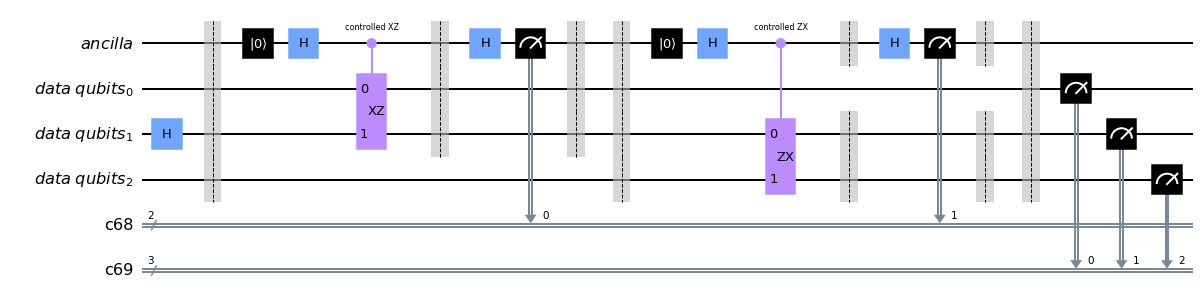

In [11]:
circy= ArcCircSim(n, start_zx=False)
circy.code_circ.draw(output="mpl")



In [4]:
from mqt.qecc import Code, UFHeuristic
code = Code(filepath)



In [ ]:
for res in experiments:
    
    output = list(res[3].keys())[0]
    uf_format = [True if k == "1" else False for k in output][:n]
    res[4] = uf_format
    print(uf_format)
    decoder = UFHeuristic()
    decoder.set_code(code)
    decoder.decode(uf_format)
    result = decoder.result
    res[5] = result.estimate

: 

: 

In [ ]:
for res in experiments:
    print(res[0].pauli_noise_list)
    print(list(res[3].keys())[0])
    print(res[5])
    print()
    